# Analysis

Notebook used for analysis of the data on housing and wages in CZ.

In [222]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [189]:
# Load data
regions = pd.read_csv("data/processed/regions.csv")
housing = pd.read_csv("data/processed/housing.csv")
wages = pd.read_csv("data/processed/wages.csv")

## Affordability

In [190]:
# join data to one
all = pd.merge(housing[["year", "region", "name_base", "family_houses", "apartments"]], wages[["year", "name_base", "avg_no_empl_adj", "avg_month_wage_adj"]], how="left", on=["name_base", "year"])

In [191]:
# calculate affordability ratio
all["afford_houses"] = all["family_houses"] / all["avg_month_wage_adj"]
all["afford_apartments"] = all["apartments"] / all["avg_month_wage_adj"]

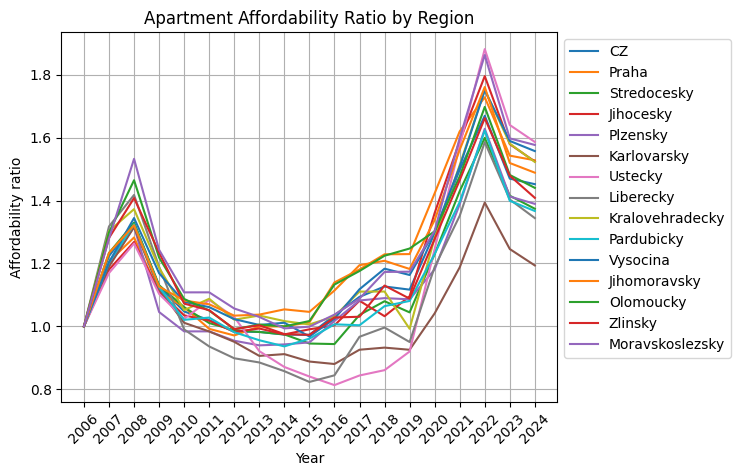

In [202]:
# Display plot of affordibility ratio of apartments per every region
for region in regions["name_base"]:
    region_data = all[all["name_base"] == region]
    plt.plot(region_data["year"], region_data["afford_apartments"], label = region)

plt.xlabel("Year")
plt.ylabel("Affordability ratio")
plt.title("Apartment Affordability Ratio by Region")
plt.xticks(ticks=all["year"].unique(), rotation=45)
plt.legend(bbox_to_anchor=(1,1.0))
plt.grid()
plt.savefig("viz/apartment_affordability.pdf", bbox_inches = "tight")
plt.show()

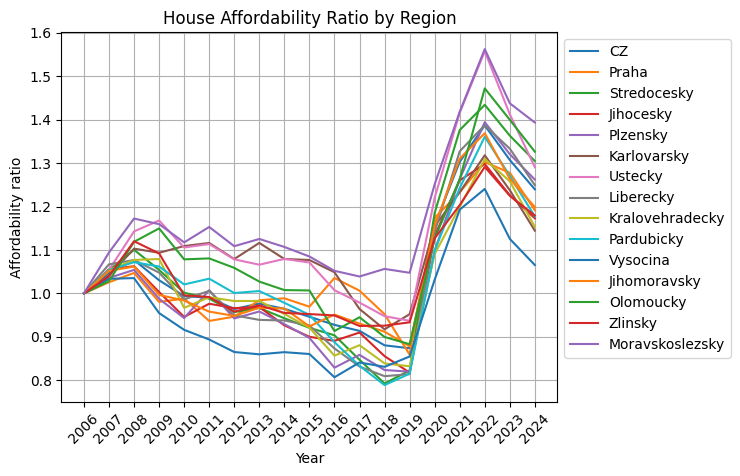

In [201]:
# Display plot of affordibility ratio of houses per every region
for region in regions["name_base"]:
    region_data = all[all["name_base"] == region]
    plt.plot(region_data["year"], region_data["afford_houses"], label = region)

plt.xlabel("Year")
plt.ylabel("Affordability ratio")
plt.title("House Affordability Ratio by Region")
plt.xticks(ticks=all["year"].unique(), rotation=45)
plt.legend(bbox_to_anchor=(1,1.0))
plt.grid()
plt.savefig("viz/house_affordability.pdf", bbox_inches = "tight")
plt.show()

### Descriptive Statistics

In [144]:
# INIT table for descriptive statistics of housing affordability on CZ

stats_house = pd.DataFrame({"name_base" : ["CZ"],
                            "type" : "house",
                            "mean" : [np.mean(all[all["name_base"]=="CZ"]["afford_houses"])],
                            "max" : [np.max(all[all["name_base"]=="CZ"]["afford_houses"])],
                            "min" : [np.min(all[all["name_base"]=="CZ"]["afford_houses"])],
                            "std" : [np.std(all[all["name_base"]=="CZ"]["afford_houses"])]
                })

# Complete for regions

for name in regions[1:]["name_base"]:
    stats_house = pd.concat([stats_house, pd.DataFrame([[name, 
                                                         "house",
                                                       np.mean(all[all["name_base"]==name]["afford_houses"]),
                                                       np.max(all[all["name_base"]==name]["afford_houses"]),
                                                       np.min((all[all["name_base"]==name]["afford_houses"])),
                                                       np.std((all[all["name_base"]==name]["afford_houses"]))
                                                       ]],
                                                       columns=stats_house.columns
                                                      )
                            ],
                            ignore_index=True
                           )

In [145]:
# INIT table for descriptive statistics of apartments affordability on CZ

stats_apt = pd.DataFrame({"name_base" : ["CZ"],
                          "type" : "apartment",
                          "mean" : [np.mean(all[all["name_base"]=="CZ"]["afford_apartments"])],
                          "max" : [np.max(all[all["name_base"]=="CZ"]["afford_apartments"])],
                          "min" : [np.min(all[all["name_base"]=="CZ"]["afford_apartments"])],
                          "std" : [np.std(all[all["name_base"]=="CZ"]["afford_apartments"])]
                })

# Complete for regions

for name in regions[1:]["name_base"]:
    stats_apt = pd.concat([stats_apt, pd.DataFrame([[name, 
                                                     "apartment",
                                                     np.mean(all[all["name_base"]==name]["afford_apartments"]),
                                                     np.max(all[all["name_base"]==name]["afford_apartments"]),
                                                     np.min((all[all["name_base"]==name]["afford_apartments"])),
                                                     np.std((all[all["name_base"]==name]["afford_apartments"]))
                                                     ]],
                                                     columns=stats_house.columns
                                                     )
                            ],
                            ignore_index=True
                           )

In [ ]:
# Union to one table
stats_all = pd.concat([stats_house, stats_apt], ignore_index=True)

# Add change between min and max
stats_all["diff"] = stats_all["max"] - stats_all["min"]

# Display statistics
stats_all

,name_base,type,mean,max,min,std,diff
0,CZ,house,1.051492,1.386758,0.873803,0.149621,0.512954
1,Praha,house,1.047270,1.302139,0.859220,0.121835,0.442919
2,Stredocesky,house,1.053350,1.434052,0.792612,0.187814,0.641439
3,Jihocesky,house,1.019385,1.297841,0.817827,0.135676,0.480014
4,Plzensky,house,1.022380,1.394189,0.819943,0.168138,0.574246
5,Karlovarsky,house,1.093880,1.317941,0.917311,0.097388,0.400630
6,Ustecky,house,1.139249,1.557220,0.936960,0.165803,0.620260
7,Liberecky,house,1.037019,1.387279,0.809490,0.172853,0.577789
8,Kralovehradecky,house,1.022415,1.309351,0.832245,0.133406,0.477106
9,Pardubicky,house,1.034311,1.360579,0.788976,0.147992,0.571602


In [236]:
# Prepare a list to collect wide-format rows
wide_extremes = []

for housing in stats_all['type'].unique():
    df_housing = stats_all[stats_all['type'] == housing]
    for measure in stats_all.columns[2:]:
        top = df_housing.sort_values(measure, ascending=False).iloc[0]
        bottom = df_housing.sort_values(measure, ascending=True).iloc[0]
        
        wide_extremes.append({
            'type': housing,
            'measure': measure,
            'top_region': top['name_base'],
            'top_value': np.round(top[measure],4),
            'bottom_region': bottom['name_base'],
            'bottom_value': np.round(bottom[measure],4)
        })

# Create DataFrame in wide format directly
top_bottom_df = pd.DataFrame(wide_extremes)
top_bottom_df

,type,measure,top_region,top_value,bottom_region,bottom_value
0,house,mean,Moravskoslezsky,1.1779,Vysocina,0.9618
1,house,max,Moravskoslezsky,1.5623,Vysocina,1.2405
2,house,min,Moravskoslezsky,1.0000,Pardubicky,0.7890
3,house,std,Stredocesky,0.1878,Karlovarsky,0.0974
4,house,diff,Stredocesky,0.6414,Zlinsky,0.3660
5,apartment,mean,Moravskoslezsky,1.2506,Karlovarsky,1.0526
6,apartment,max,Ustecky,1.8818,Karlovarsky,1.3936
7,apartment,min,Jihomoravsky,1.0000,Ustecky,0.8131
8,apartment,std,Ustecky,0.3076,Karlovarsky,0.1537
9,apartment,diff,Ustecky,1.0687,Karlovarsky,0.5134
